In [7]:
pth = 'C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/' 
folder = 'Figure 4/'
figs_folder = 'Figs/'

PTsample = 'Molecule 4 (BPT)'
analyte = 'BPT'
metal = 'Au'
NPsize = '80 nm'
NPshape = 'NPoM'

In [32]:
import importlib #importlib.reload(ba)
from time import process_time
import datetime
import sys
sys.path.insert(1, pth)
import h5py
import csv
import matplotlib.pyplot as plt
import matplotlib.colors as clrs
import matplotlib.ticker as ticker
import numpy as np
# from scipy.signal import find_peaks
# from scipy.signal import peak_widths
# from scipy.signal import savgol_filter
from scipy.optimize import curve_fit
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from os import listdir
import matplotlib.dates as mdates

import basics_forGithub as ba
import ERSremoval_forGithub as ers
import GetDFpeaks as gdfp
import ExpRemoval_forGithub as exp
import PT_Analysis_new_forGithub as pt
import Picocavities_forGithub as pc

ba.PrintCurrentDateTime()

date and time = 31/01/2024 11:34:40


In [3]:
# colormap = 'nipy_spectral'
sample_list_for_fig = ['ABT-Br-F','NPT','MBN','BPT','Br-BPT','NC-BPT','TPT']
colors = ['#ce62f4ff','#f59b07ff','#ff0047ff','#000080ff','#bdd52dff','#288c6eff','#4575f0ff']
colors_dict = dict(zip(sample_list_for_fig,colors))
sample_color = colors_dict[analyte]

plt.rcParams["font.family"] = 'Calibri'
plt.rcParams.update({'font.size': 10})
plt.rcParams.update({
    "text.usetex": False,
})

cm = 1/2.54  # centimeters in inches

In [4]:
readoutnoiselevel = 300.7
WLcenter=784.8

In [5]:
# '2021-11-02 16:34:48.890379'
fmt = '%Y-%m-%d %H:%M:%S.%f'

In [21]:
h5file = '2021-11-02_combined.h5'
fullname = pth + folder + h5file
with h5py.File(fullname, 'r') as f: 
    print('Measurement sets:',f.keys(),'\n')
    print('Num particles:',len(f['ParticleScannerScan_0'].keys()))
    print('Measurements:',f['ParticleScannerScan_0']['Particle_0'].keys())

Measurement sets: <KeysViewHDF5 ['ParticleScannerScan_0', 'Reference and Background Spectra']> 

Num particles: 610
Measurements: <KeysViewHDF5 ['CWL.thumb_image_0', 'SERS_0', 'z_scan_0', 'z_scan_1']>


In [17]:
pth + folder

Gen_Wn_filename = pth + folder + '/BPT_Gen_Wn.csv'
X = ba.LoadGen_Wn(Gen_Wn_filename) 

In [22]:
PTcolor = 'darkorchid'
power = 0.5 #mW

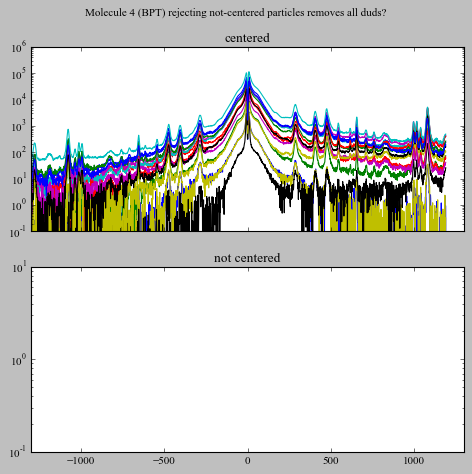

Dataset contains 0 single spectra (instead of timescans)


In [24]:
selectK = ['Particle_145','Particle_172','Particle_233',
            'Particle_449','Particle_452','Particle_453','Particle_458',
           'Particle_510','Particle_547','Particle_551','Particle_553','Particle_555','Particle_556','Particle_561',
           'Particle_578',
          ]
mode = 'nano'
centered,not_centered = pt.CenteredSelectK(pth,folder,h5file,PTsample,selectK,
                                           readoutnoiselevel,X,power,threshold=0.05,mode=mode,
                                           skipsingles=True,show=True,save=False,testing=False)

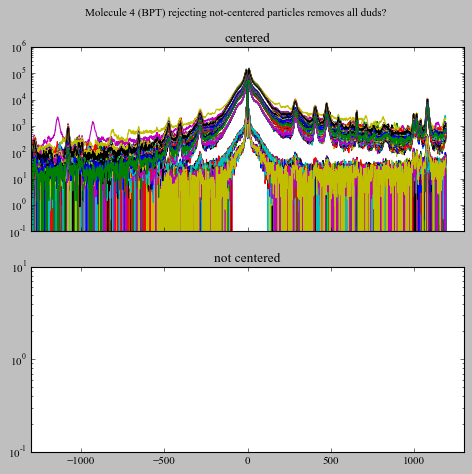

In [26]:
selectK = ['Particle_145','Particle_172','Particle_233',
            'Particle_449','Particle_452','Particle_453','Particle_458',
           'Particle_578',
          ]

centered_S,not_centered_S = pt.CenteredS(pth,folder,h5file,PTsample,selectK,readoutnoiselevel,X,power,
          threshold=0.05,show=True,save=False,testing=False)

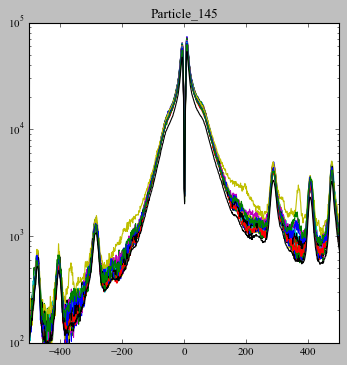

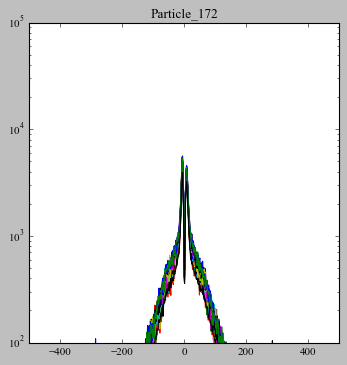

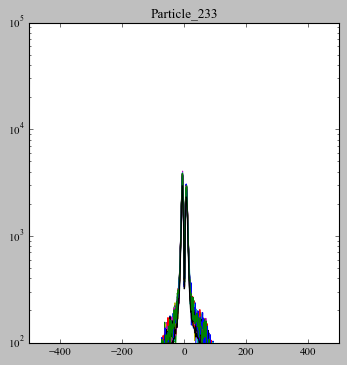

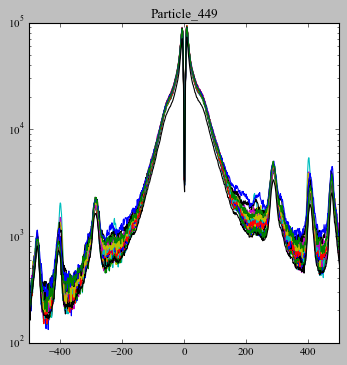

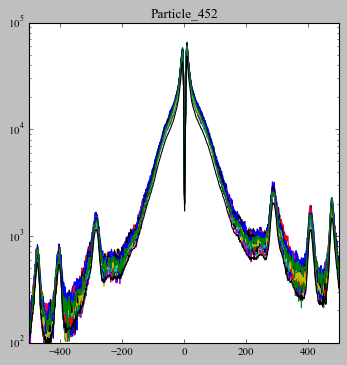

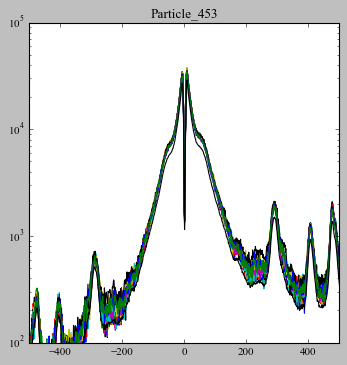

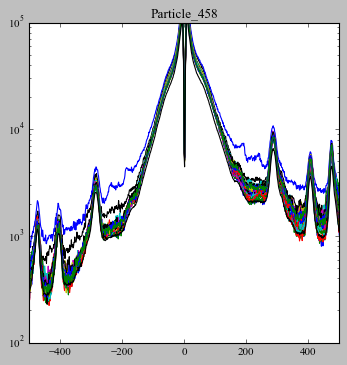

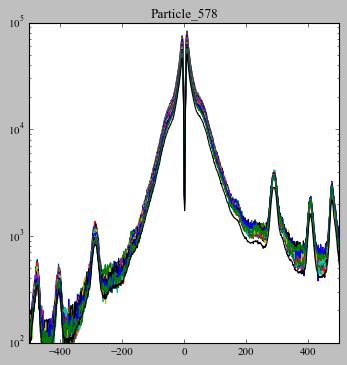

In [27]:
# # fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(5,5))
# for particle in list(centered_S.keys()):
#     fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(5,5))
#     for time in centered_S[particle].keys():
#         ax.plot(X,centered_S[particle][time])
        
# #for particle in list(centered.keys()):
#     ax.plot(X,centered[particle],color='k',label=particle)
    
#     ax.set(title=particle,yscale='log',ylim=[10**2,10**5],xlim=[-500,500])
# #     ax.legend()

In [28]:
fit_exp_of_these = ['Particle_145','Particle_172','Particle_233','Particle_452','Particle_453','Particle_578']
THzpicocavities = ['Particle_145','Particle_233','Particle_441','Particle_449','Particle_452','Particle_458',
                   'Particle_578']

In [124]:
particle = 'Particle_452'#Particle_449'#'Particle_233'#'Particle_458'#'Particle_578'
# particle = 'Particle_459' # paper

In [30]:
pico_dict = {}

Starting to make SERS image.
(30, 2048)


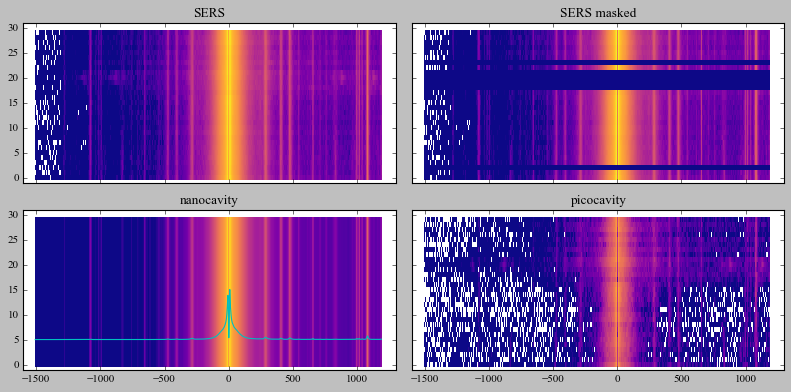

In [54]:
num_stds=3.5#1#4#3.5
multiplier = 1#3.3 #3
degree = 0#1.
subfolder = ''


                                                    #Exp_dict
pico_dict = pc.PlotPicocavities2(X,PTsample,particle,centered_S,'before',pico_dict,subfolder,multiplier,degree,
                             num_stds=num_stds,vmin=50,
                                 mask=True,
                                 testing=False)

start time: 10.0
['10', '20']


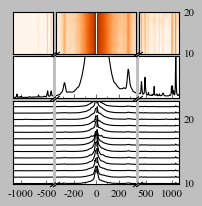

In [55]:
title = 'Before ERS or exp removal, yes masking'
notchedge = 5.
with h5py.File(fullname, 'r') as f: 
    exposure_time = f['ParticleScannerScan_0'][particle]['SERS_0'].attrs['Exposure'] # seconds
pc.Figure4(X,PTsample,pico_dict,particle,exposure_time,pth+folder,title,notchedge=5,save=False)

Starting to make SERS image.
(30, 2048)


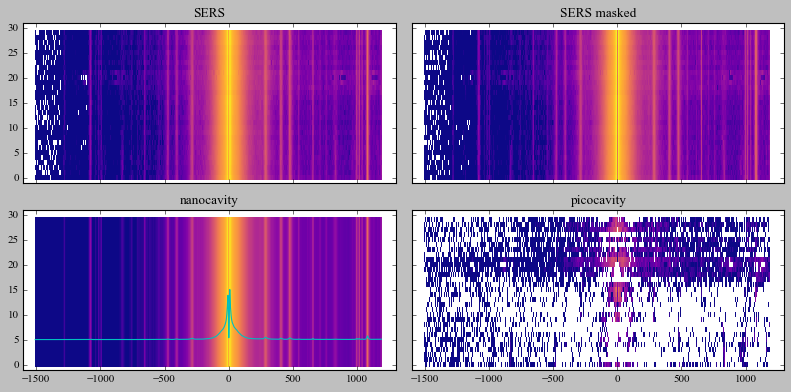

In [58]:
# if not masking:

num_stds=1#4#3.5
multiplier = 3#3.3 #3
degree = 0#1.
subfolder = ''


                                                    #Exp_dict
pico_dict = pc.PlotPicocavities2(X,PTsample,particle,centered_S,'before',pico_dict,subfolder,multiplier,degree,
                             num_stds=num_stds,vmin=50,
                                 mask=False,
                                 testing=False)

start time: 10.0
['10', '20']


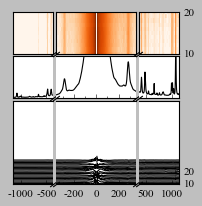

In [59]:
title = 'Before ERS or exp removal, no masking'
notchedge = 5.
with h5py.File(fullname, 'r') as f: 
    exposure_time = f['ParticleScannerScan_0'][particle]['SERS_0'].attrs['Exposure'] # seconds
pc.Figure4(X,PTsample,pico_dict,particle,exposure_time,pth+folder,title,notchedge=5,save=False)

In [60]:
SERS = pico_dict[PTsample][particle]['im']
nano = pico_dict[PTsample][particle]['nanocavity im']
pico = pico_dict[PTsample][particle]['picocavity im']
pico2 = SERS - nano

In [74]:
colors_r = ba.CreateColorsList(len(pico))

C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/Thesis figures/Chapter 4/Picocavities/Molecule 4 (BPT) Particle_452 before ERS and exp removal wmasking Nano and Picocav.png


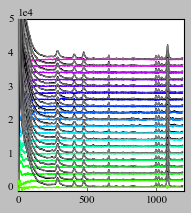

In [76]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(6.8*cm,6.8*cm))
offset=0
zorder=len(pico)
for m in range(len(pico)):
    if 10 <= m <= 29:
        ax.plot(X,SERS[m]+offset,color='k',zorder=zorder)#0)
        ax.plot(X,nano[m]+offset,color='grey',zorder=zorder)#1)
        ax.plot(X,pico2[m]+offset,color=colors_r[m],zorder=zorder)
        offset+=2*10**3#8*10**3#1.*10**4
        zorder-=1
    
ax.set(xlim=[0,1200],ylim=[-10**3,5*10**4])#1.3*10**5])#9*10**4])

ax.xaxis.labelpad = 0.1
ax.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
# ax.set_yticks([20000,60000])
ax.xaxis.set_major_locator(MultipleLocator(500))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
# ax.xaxis.set_minor_locator(MultipleLocator(100))

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

Title = PTsample+' '+particle+' before ERS and exp removal wmasking'
figname = pth+'Thesis figures/Chapter 4/Picocavities/'+Title+' Nano and Picocav.png'
print(figname)
ba.ensure_dir(figname)
# fig.savefig(figname,format='png',bbox_inches='tight',transparent=True,dpi=300)

C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/Thesis figures/Chapter 4/Picocavities/Molecule 4 (BPT) Particle_452 before ERS and exp removal wmasking Picocav.png


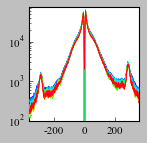

In [77]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(4.5*cm,4.5*cm))
offset=0
zorder=len(pico)
for m in range(len(pico)):
    if 0 <= m <= 29:
        ax.plot(X,SERS[m]+offset,color=colors_r[m],zorder=zorder,lw=0.5)#0)
        #ax.plot(X,nano[m]+offset,color='grey',zorder=zorder)#1)
        #ax.plot(X,pico2[m]+offset,color=colors[m],zorder=zorder)
        offset+=0#8*10**3#1.*10**4
        zorder-=1
    
ax.set(xlim=[-360,360],ylim=[1.*10**2,0.75*10**5],yscale='log')#9*10**4])

ax.xaxis.labelpad = 0.1
# ax.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
# ax.set_yticks([20000,60000])
ax.xaxis.set_major_locator(MultipleLocator(200))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
# ax.xaxis.set_minor_locator(MultipleLocator(100))

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

Title = PTsample+' '+particle+' before ERS and exp removal wmasking'
figname = pth+'Thesis figures/Chapter 4/Picocavities/'+Title+' Picocav.png'
print(figname)
ba.ensure_dir(figname)
# fig.savefig(figname,format='png',bbox_inches='tight',transparent=True,dpi=300)

In [78]:
ERS_dict_S = {}
ERS_params_dict_S = {}
ERS_initial_params_dict_S = {}

date and time = 31/01/2024 11:47:18
Particle_452
rmse: 0.14791062615573888
all DF peaks_x in GetDFpeaks [55.006342835211626, -551.6293040737003]
DF peaks_x sorted in GetDFpeaks [55.006342835211626, -551.6293040737003]
DF x_peaks_final in GetDFpeaks [55.006342835211626, -551.6293040737003] 



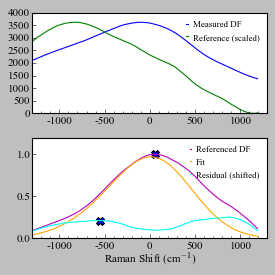

initial cost 0.7670571101785416 final_cost 0.5671906311514404
Running simulated annealing again with same settings to get second result.
Final cost 0.47831639125420145
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/Figure 4/Figs/ERSfit//Molecule 4 (BPT) Particle_452_Particle_452_0_1fittingERS_.png
initial cost 0.7346367840256097 final_cost 0.4903336828811799
Running simulated annealing again with same settings to get second result.
Final cost 0.4692075629694424
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/Figure 4/Figs/ERSfit//Molecule 4 (BPT) Particle_452_Particle_452_1_1fittingERS_.png
initial cost 0.7310404547723537 final_cost 0.539521711658217
Running simulated annealing again with same settings to get second result.
Final cost 0.48201266632065703
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/Figure 4/Figs/ERSfit//Molecule 4 (BPT) Particle_452_Particle_452_2_1fittingERS_.png
initial cost 0.748335986988543 final_cost 0.4908722152735848
Runni

Final cost 0.4400601080990728
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/Figure 4/Figs/ERSfit//Molecule 4 (BPT) Particle_452_Particle_452_26_1fittingERS_.png
initial cost 0.8166024280145623 final_cost 0.46640621367690394
Running simulated annealing again with same settings to get second result.
Final cost 0.46640621367690394
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/Figure 4/Figs/ERSfit//Molecule 4 (BPT) Particle_452_Particle_452_27_1fittingERS_.png
initial cost 0.7941105103855629 final_cost 0.47273306437006324
Running simulated annealing again with same settings to get second result.
Final cost 0.469450666755543
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/Figure 4/Figs/ERSfit//Molecule 4 (BPT) Particle_452_Particle_452_28_1fittingERS_.png
initial cost 0.7396849147450011 final_cost 0.44322078668642867
Running simulated annealing again with same settings to get second result.
Final cost 0.44322078668642867
C:/Users/aboeh/OneDrive/Docume

In [81]:
ba.PrintCurrentDateTime()



df_testing = True
ers_testing = False

peak_params = [1.,10.,0.1] # prominence,half width,height


for particle in [particle]:
    title = PTsample+' '+particle
    if not ers_testing:
        ERS_dict_S[particle] = {}
        ERS_params_dict_S[particle] = {}
        ERS_initial_params_dict_S[particle] = {}

    # ~    DF    ~    DF    ~    DF    ~
    DF_peaks_x,DF_fwhms = gdfp.GetDF_peakmaxfwhm_1particle(pth,folder+h5file,X,particle,readoutnoiselevel,
                                                           thirdround=True,
                                                           testing=df_testing)
    DF_spectrum = gdfp.GetDF_spectrum_1particle(pth,folder+h5file,X,particle,readoutnoiselevel)
    # ~    DF    ~    DF    ~    DF    ~

    t=0
    for time in centered_S[particle].keys():
#         if t==13:
        Y = centered_S[particle][time]

        # This is region2 in CalculateERS, used in simulated_annealing (not the region used for ASto0)
        # The first value is used in get_cost_v2 to evaluate cost, i.e. spectrum below region[0] is ignored.
        region = [-1100,-550]#[-700,1200]#
        replace = False
        fit_gauss = True

        # have to use notchedge = 5 for some picocavities (e.g. Particle_330), as for BPc
        # otherwise ERS is above spectrum in some part of region below 100 cm-1
        Ynew,ERS,solution,initial_state = ers.CalculateERS(pth,folder+'Figs/',title+'_'+particle+'_'+str(t),
                                                               X,Y,region,
                                                               DF_peaks_x,DF_fwhms,DF_spectrum,
                                                                  removepeaks=True,
                                                                  peak_params=peak_params,
                                                                  fit_gauss=fit_gauss,T0=290.,
                                                                  replace=replace,
                                                                  sv2=False,plot=True,testing=ers_testing)


        ERS_dict_S[particle][time] = (Ynew,ERS)
        ERS_params_dict_S[particle][time] = solution
        ERS_initial_params_dict_S[particle][time] = initial_state # Stokes_height = initial_state[0]
        t+=1

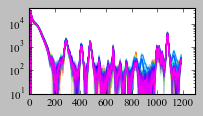

In [84]:
for particle in [particle]:
    fig,ax = plt.subplots(figsize=(6.8*cm,3.4*cm))
    colors = ba.CreateColorsList(len(ERS_dict_S[particle].keys()))
    for c,time in enumerate(ERS_dict_S[particle].keys()):
        Ynew,ERS = ERS_dict_S[particle][time]
        Y = ba.ReduceNoise(X,Ynew,1,cutoff = 5000)
        ax.plot(X,Ynew,color=colors[c],alpha=0.25)
        ax.plot(X,Y,color=colors[c],label=time)

    ax.set(ylim=[10**1,5*10**4],xlim=[0,1300],yscale='log')
    #ax.legend(loc=[1.01,0],fontsize=8,ncol=1)

In [85]:
print(particle)
ERS_dict_S[particle].keys()

Particle_452


dict_keys(['0.0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0', '11.0', '12.0', '13.0', '14.0', '15.0', '16.0', '17.0', '18.0', '19.0', '20.0', '21.0', '22.0', '23.0', '24.0', '25.0', '26.0', '27.0', '28.0', '29.0'])

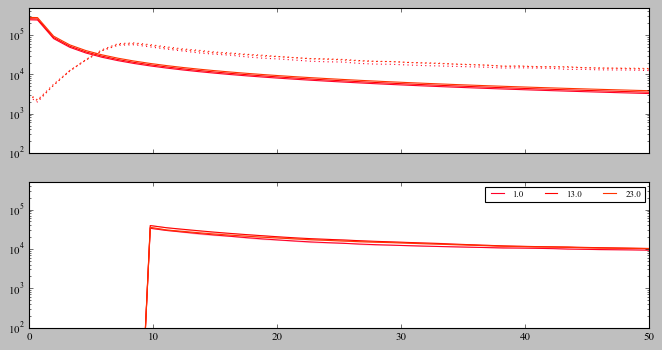

In [86]:
for particle in [particle]:
    fig,axes = plt.subplots(figsize=(10,5),nrows=2,sharex=True)
    colors = ba.CreateColorsList(len(ERS_dict_S[particle].keys()))
    for c,time in enumerate(['1.0', '13.0', '23.0']):#ERS_dict_S[interval][particle].keys()):
        Y = centered_S[particle][time]
        Ynew,ERS = ERS_dict_S[particle][time]
        Y_fltrd = ba.ReduceNoise(X,Ynew,1,cutoff = 5000)

        axes[0].plot(X,Y,color=colors[c],ls=':')
        axes[0].plot(X,ERS,color=colors[c])
        axes[1].plot(X,Ynew,color=colors[c],alpha=0.25)
        axes[1].plot(X,Y_fltrd,color=colors[c],label=time)
    for ax in axes:
        ax.set(ylim=[10**2,5*10**5],xlim=[0,50],yscale='log')
    axes[1].legend(loc='best',fontsize=8,ncol=3)

In [88]:
print(centered_S.keys())
print(ERS_dict_S.keys())
print()
print(centered_S['Particle_578'].keys())
# print(ERS_dict_S['Particle_578'].keys())

dict_keys(['Particle_145', 'Particle_172', 'Particle_233', 'Particle_449', 'Particle_452', 'Particle_453', 'Particle_458', 'Particle_578'])
dict_keys(['Particle_452'])

dict_keys(['0.0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0', '11.0', '12.0', '13.0', '14.0', '15.0', '16.0', '17.0', '18.0', '19.0', '20.0', '21.0', '22.0', '23.0', '24.0', '25.0', '26.0', '27.0', '28.0', '29.0'])


Particle_452
Starting to make SERS image.
(30, 2048)


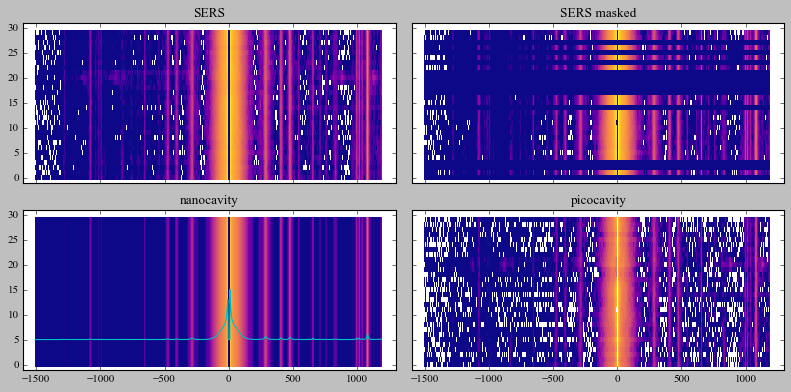

In [89]:
num_stds=3.2#1#4#3.5
multiplier = 3#3.3 #3
degree = 0#1.
subfolder = ''

print(particle)

                                                    #Exp_dict
pico_dict = pc.PlotPicocavities2(X,PTsample,particle,ERS_dict_S,'ERS',pico_dict,subfolder,multiplier,degree,
                             num_stds=num_stds,vmin=50,
                                 mask=True,
                                 testing=False)

start time: 10.0
['10', '20']


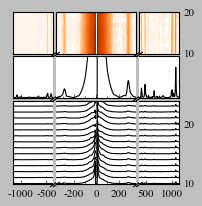

In [90]:
title = 'After ERS and before exp removal, yes masking'
notchedge = 5.
with h5py.File(fullname, 'r') as f: 
    exposure_time = f['ParticleScannerScan_0'][particle]['SERS_0'].attrs['Exposure'] # seconds
pc.Figure4(X,PTsample,pico_dict,particle,exposure_time,pth,title,notchedge=5,save=False)

In [91]:
SERS = pico_dict[PTsample][particle]['im']
nano = pico_dict[PTsample][particle]['nanocavity im']
pico = pico_dict[PTsample][particle]['picocavity im']
pico2 = SERS - nano

878 -55.43992820656956
881 -61.98297288688127
1526 -73.67656867301092
1202 -89.4162305250386
1206 -65.53925499862987
870 -64.36946434571877
1196 -79.5984232000178
872 -72.77637989761615
1336 -68.31757403525344
1500 -40.11750613166859
882 -65.8007537928014
879 -67.4446882407575
1778 -46.455028779733325
1325 -67.88753510938466
1199 -73.66764095624205
880 -51.78610934160656
1204 -42.32579543861311
780 -45.25429438663784
1190 -106.16832275150068
1195 -84.34519372697866
1333 -73.29121310065523
1202 -64.34429247904518
871 -88.99621729731075
1772 -58.34358299411855
1194 -87.49597262033194
1514 -91.28187121346303
1195 -66.6759898045309
887 -90.36452302730572
879 -63.22325202855848
1463 -90.92523231678595


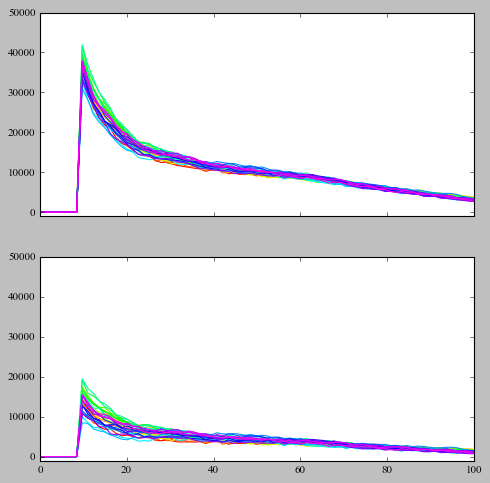

In [92]:
fig,axes = plt.subplots(nrows=2,ncols=1,figsize=(7,7),sharex=True)
color = ba.CreateColorsList(np.shape(SERS)[0])
for r in range(np.shape(SERS)[0]):
    print(np.argmin(SERS[r]),np.min(SERS[r]))
    axes[0].plot(X,SERS[r],color=colors[r])
    axes[1].plot(X,pico2[r],color=colors[r])
for ax in axes:
    ax.set(xlim=[0,100],ylim=[-10**3,5*10**4])

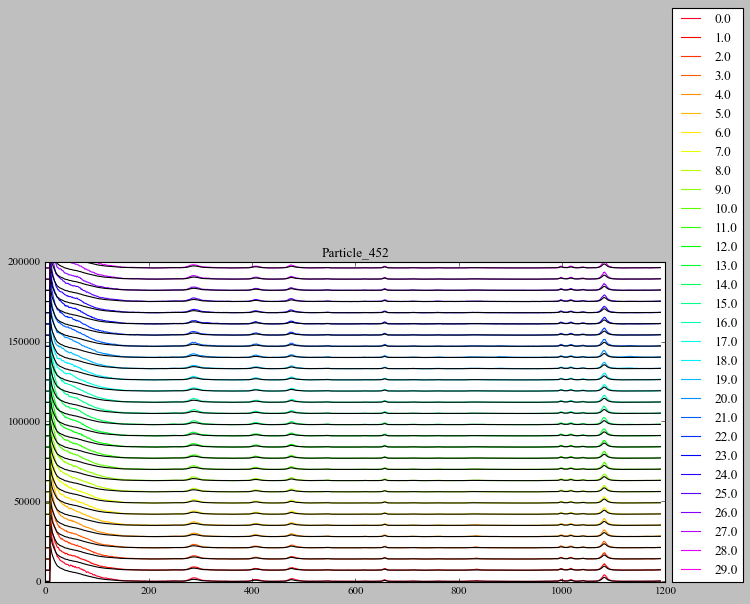

In [94]:
for particle in [particle]:#'Particle_459']:
    fig, ax = plt.subplots(1, 1, figsize=(10,5))
    offset=0
    colors = ba.CreateColorsList(len(ERS_dict_S[particle].keys()))
    for t,time in enumerate(ERS_dict_S[particle].keys()):
        Y,ERS = ERS_dict_S[particle][time]
        nano_row = nano[t]
        ax.plot(X,Y+offset,color=colors[t],label=time)
        ax.plot(X,nano_row+offset,color='k',lw=1)
        offset+=7000
#     mns = []
#     for m in range(np.shape(im)[0]):
        
#         mn_i = np.argmin(im[m,:])
#         mns.append(mn_i)
#         #print(WN[mn_i],im[m,:][mn_i])
#         if im[m,:][mn_i] < -500:
#             ax.plot(WN,im[m,:])
        
    ax.set(xlim=[0,1200],title=particle,ylim=[-100,2*10**5])
    
    ax.legend(loc=[1.01,0])

C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/Figure 4/Figs/Molecule 4 (BPT) Particle_452 after ERS removal Nano and Picocav.png


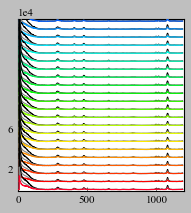

In [99]:
# fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(6.8*cm,8*cm))
# offset=0
# zorder=len(picocavity_im)
# for m in range(len(picocavity_im)):
#     if 0 <= m <= 20:#29:
#         ax.plot(X,SERS[m]+offset,color='k',zorder=zorder)#0)
#         ax.plot(X,nano[m]+offset,color='grey',zorder=zorder)#1)
#         ax.plot(X,pico2[m]+offset,color=colors[m],zorder=zorder)
#         offset+=8*10**3#1.*10**4
#         zorder-=1
    
# ax.set(xlim=[0,1200],ylim=[-10**3,1.8*10**5])#9*10**4])

# ax.xaxis.labelpad = 0.1
# ax.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
# ax.set_yticks([20000,60000])
# ax.xaxis.set_major_locator(MultipleLocator(500))
# ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
# ax.xaxis.set_minor_locator(MultipleLocator(250))

# ax.xaxis.set_ticks_position('bottom')
# ax.yaxis.set_ticks_position('left')



fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(6.8*cm,6.8*cm))
offset=0
zorder=len(pico)
for m in range(len(pico)):
    if 0 <= m <= 29:
        ax.plot(X,SERS[m]+offset,color='k',zorder=zorder)#0)
        ax.plot(X,nano[m]+offset,color='grey',zorder=zorder)#1)
        ax.plot(X,pico2[m]+offset,color=colors[m],zorder=zorder,label=time)
        offset+=8*10**3#1.*10**4
        zorder-=1
    
ax.set(xlim=[0,1200],ylim=[-10**3,1.7*10**5])#9*10**4])

ax.xaxis.labelpad = 0.1
ax.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
ax.set_yticks([20000,60000])
ax.xaxis.set_major_locator(MultipleLocator(500))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
# ax.xaxis.set_minor_locator(MultipleLocator(100))

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

Title = PTsample+' '+particle+' after ERS removal'
figname = pth+folder+'Figs/'+Title+' Nano and Picocav.png'
print(figname)
ba.ensure_dir(figname)
# fig.savefig(figname,format='png',bbox_inches='tight',transparent=True,dpi=300)

In [101]:
ERS_dict_S[particle].keys()

dict_keys(['0.0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0', '11.0', '12.0', '13.0', '14.0', '15.0', '16.0', '17.0', '18.0', '19.0', '20.0', '21.0', '22.0', '23.0', '24.0', '25.0', '26.0', '27.0', '28.0', '29.0'])

In [100]:
Exp_dict_S = {}
Exp_param_dict_S = {}

date and time = 31/01/2024 12:46:48
Molecule 4 (BPT) Particle_452 
 
0.0
*** Molecule 4 (BPT) Particle_452 0exp removed ***
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/Figure 4/Figs/Expfit/Molecule 4 (BPT) Particle_452 0exp removed_2fittingExponential.png


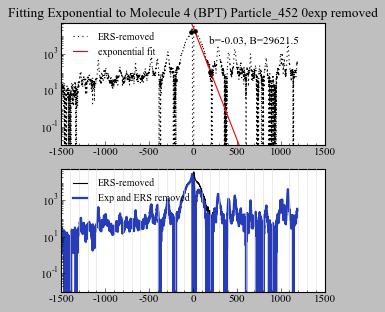

1.0
*** Molecule 4 (BPT) Particle_452 1exp removed ***
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/Figure 4/Figs/Expfit/Molecule 4 (BPT) Particle_452 1exp removed_2fittingExponential.png


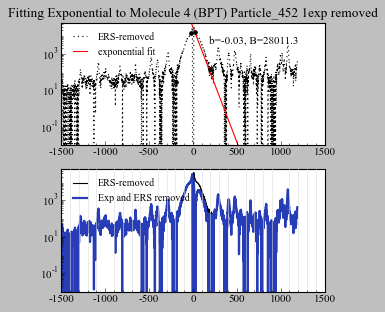

2.0
*** Molecule 4 (BPT) Particle_452 2exp removed ***
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/Figure 4/Figs/Expfit/Molecule 4 (BPT) Particle_452 2exp removed_2fittingExponential.png


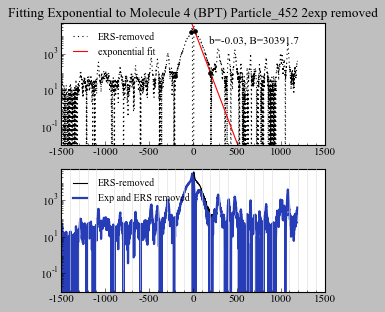

3.0
*** Molecule 4 (BPT) Particle_452 3exp removed ***
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/Figure 4/Figs/Expfit/Molecule 4 (BPT) Particle_452 3exp removed_2fittingExponential.png


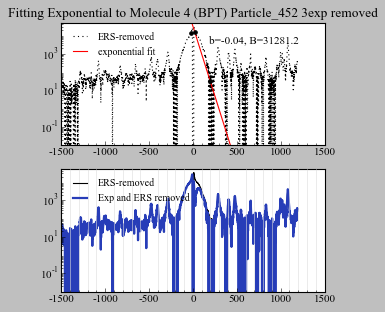

4.0
*** Molecule 4 (BPT) Particle_452 4exp removed ***
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/Figure 4/Figs/Expfit/Molecule 4 (BPT) Particle_452 4exp removed_2fittingExponential.png


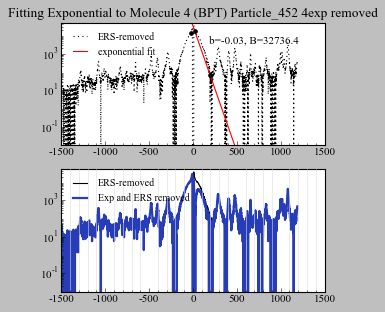

5.0
*** Molecule 4 (BPT) Particle_452 5exp removed ***
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/Figure 4/Figs/Expfit/Molecule 4 (BPT) Particle_452 5exp removed_2fittingExponential.png


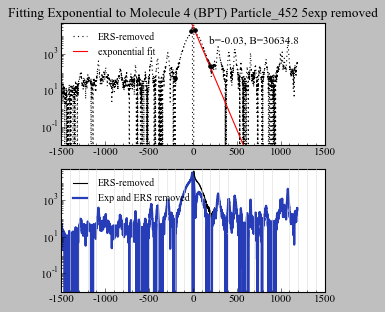

6.0
*** Molecule 4 (BPT) Particle_452 6exp removed ***
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/Figure 4/Figs/Expfit/Molecule 4 (BPT) Particle_452 6exp removed_2fittingExponential.png


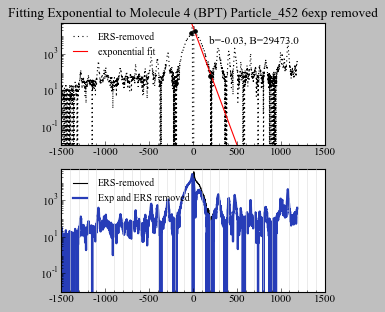

7.0
*** Molecule 4 (BPT) Particle_452 7exp removed ***
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/Figure 4/Figs/Expfit/Molecule 4 (BPT) Particle_452 7exp removed_2fittingExponential.png


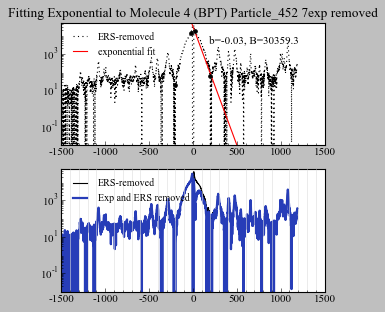

8.0
*** Molecule 4 (BPT) Particle_452 8exp removed ***
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/Figure 4/Figs/Expfit/Molecule 4 (BPT) Particle_452 8exp removed_2fittingExponential.png


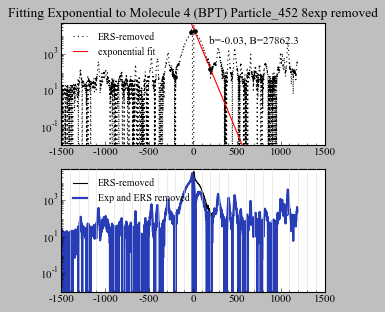

9.0
*** Molecule 4 (BPT) Particle_452 9exp removed ***
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/Figure 4/Figs/Expfit/Molecule 4 (BPT) Particle_452 9exp removed_2fittingExponential.png


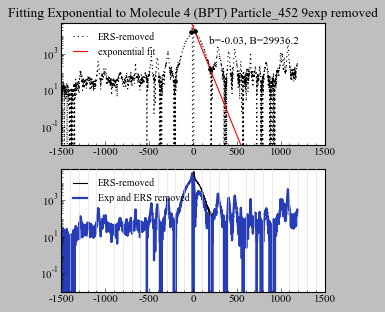

10.0
*** Molecule 4 (BPT) Particle_452 10exp removed ***
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/Figure 4/Figs/Expfit/Molecule 4 (BPT) Particle_452 10exp removed_2fittingExponential.png


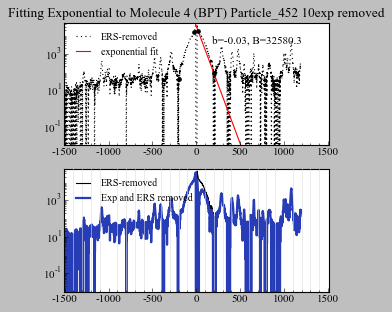

11.0
*** Molecule 4 (BPT) Particle_452 11exp removed ***
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/Figure 4/Figs/Expfit/Molecule 4 (BPT) Particle_452 11exp removed_2fittingExponential.png


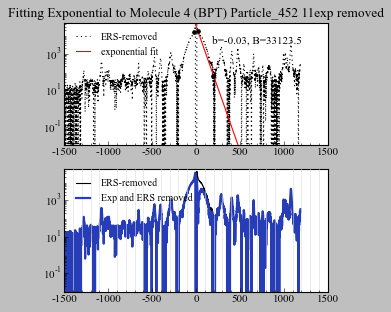

12.0
*** Molecule 4 (BPT) Particle_452 12exp removed ***
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/Figure 4/Figs/Expfit/Molecule 4 (BPT) Particle_452 12exp removed_2fittingExponential.png


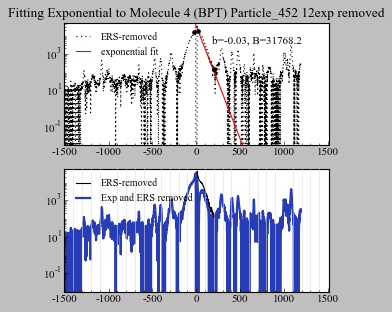

13.0
*** Molecule 4 (BPT) Particle_452 13exp removed ***
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/Figure 4/Figs/Expfit/Molecule 4 (BPT) Particle_452 13exp removed_2fittingExponential.png


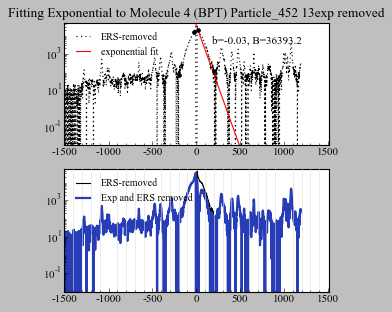

14.0
*** Molecule 4 (BPT) Particle_452 14exp removed ***
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/Figure 4/Figs/Expfit/Molecule 4 (BPT) Particle_452 14exp removed_2fittingExponential.png


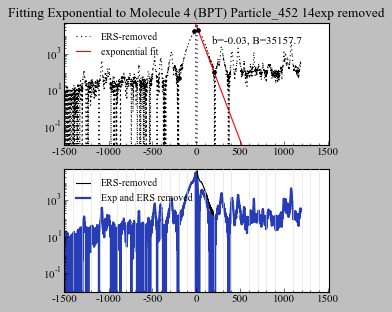

15.0
*** Molecule 4 (BPT) Particle_452 15exp removed ***
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/Figure 4/Figs/Expfit/Molecule 4 (BPT) Particle_452 15exp removed_2fittingExponential.png


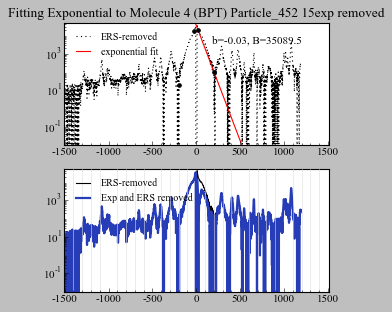

16.0
*** Molecule 4 (BPT) Particle_452 16exp removed ***
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/Figure 4/Figs/Expfit/Molecule 4 (BPT) Particle_452 16exp removed_2fittingExponential.png


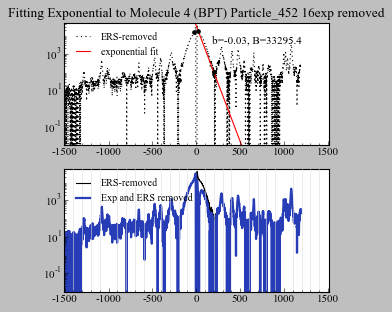

17.0
*** Molecule 4 (BPT) Particle_452 17exp removed ***
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/Figure 4/Figs/Expfit/Molecule 4 (BPT) Particle_452 17exp removed_2fittingExponential.png


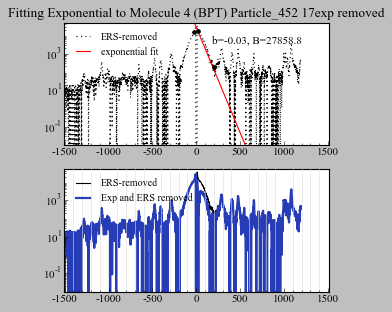

18.0
*** Molecule 4 (BPT) Particle_452 18exp removed ***
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/Figure 4/Figs/Expfit/Molecule 4 (BPT) Particle_452 18exp removed_2fittingExponential.png


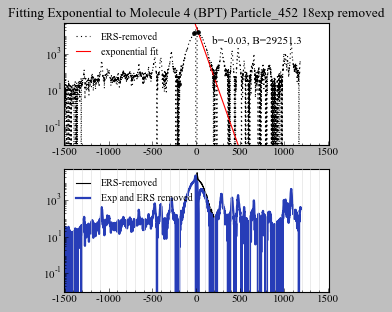

19.0
*** Molecule 4 (BPT) Particle_452 19exp removed ***
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/Figure 4/Figs/Expfit/Molecule 4 (BPT) Particle_452 19exp removed_2fittingExponential.png


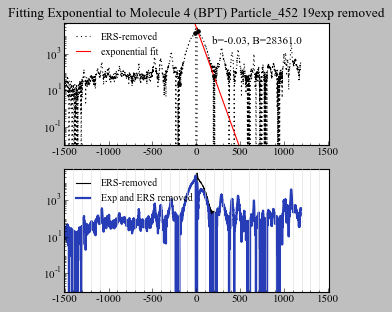

20.0
*** Molecule 4 (BPT) Particle_452 20exp removed ***
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/Figure 4/Figs/Expfit/Molecule 4 (BPT) Particle_452 20exp removed_2fittingExponential.png


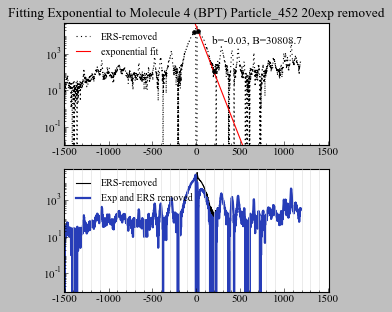

21.0
*** Molecule 4 (BPT) Particle_452 21exp removed ***
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/Figure 4/Figs/Expfit/Molecule 4 (BPT) Particle_452 21exp removed_2fittingExponential.png


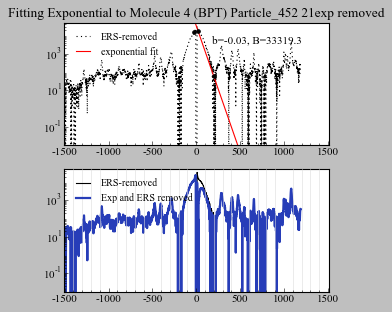

22.0
*** Molecule 4 (BPT) Particle_452 22exp removed ***
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/Figure 4/Figs/Expfit/Molecule 4 (BPT) Particle_452 22exp removed_2fittingExponential.png


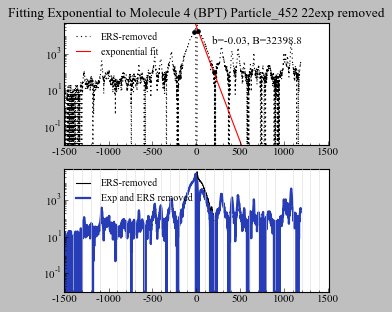

23.0
*** Molecule 4 (BPT) Particle_452 23exp removed ***
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/Figure 4/Figs/Expfit/Molecule 4 (BPT) Particle_452 23exp removed_2fittingExponential.png


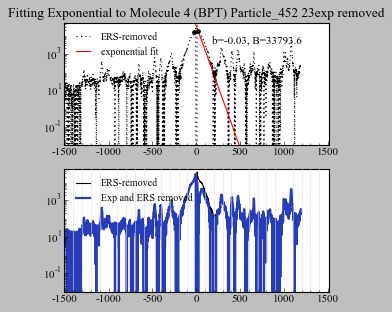

24.0
*** Molecule 4 (BPT) Particle_452 24exp removed ***
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/Figure 4/Figs/Expfit/Molecule 4 (BPT) Particle_452 24exp removed_2fittingExponential.png


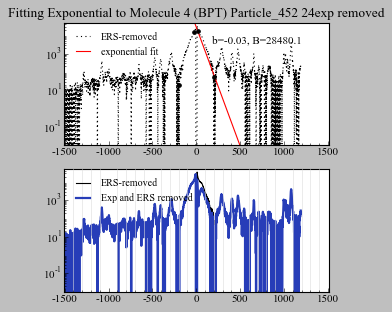

25.0
*** Molecule 4 (BPT) Particle_452 25exp removed ***
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/Figure 4/Figs/Expfit/Molecule 4 (BPT) Particle_452 25exp removed_2fittingExponential.png


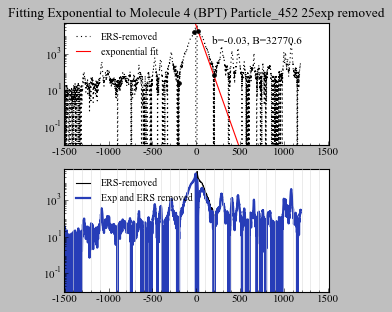

26.0
*** Molecule 4 (BPT) Particle_452 26exp removed ***
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/Figure 4/Figs/Expfit/Molecule 4 (BPT) Particle_452 26exp removed_2fittingExponential.png


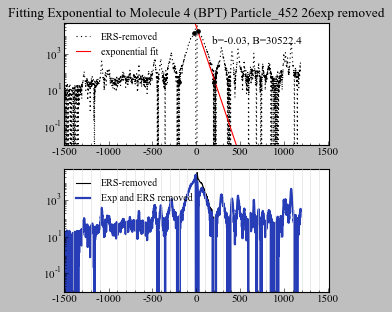

27.0
*** Molecule 4 (BPT) Particle_452 27exp removed ***
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/Figure 4/Figs/Expfit/Molecule 4 (BPT) Particle_452 27exp removed_2fittingExponential.png


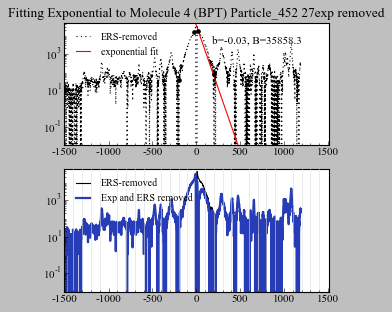

28.0
*** Molecule 4 (BPT) Particle_452 28exp removed ***
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/Figure 4/Figs/Expfit/Molecule 4 (BPT) Particle_452 28exp removed_2fittingExponential.png


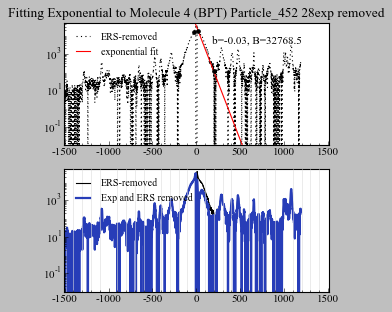

29.0
*** Molecule 4 (BPT) Particle_452 29exp removed ***
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/Figure 4/Figs/Expfit/Molecule 4 (BPT) Particle_452 29exp removed_2fittingExponential.png


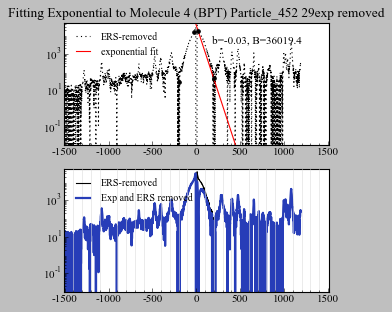

In [103]:
ba.PrintCurrentDateTime()

exp_testing = False
Title = 'Exponential below 200 cm-1 removed'

for p,particle in enumerate([particle]): 
    print(PTsample, particle, '\n ')
    Exp_dict_S[particle] = {}
    Exp_param_dict_S[particle] = {} 
    t=0
    for time in ERS_dict_S[particle].keys():
        print(time)
        title = PTsample+' '+particle+' '+str(t)
        Title = title + 'exp removed'

        Ynew,ERS = ERS_dict_S[particle][time]



        ylim = [10**-1,np.max(Ynew)]#1.5*10**4] # for SpectrumWithoutPeaks
        peak_params=(10.,10.,10.)#(10.,50.,5.) # height,prominence, base width

        WN_nonotch,Ynewnewnew,fit_params = exp.RemoveExponential(pth,folder+'Figs/',Title,X,Ynew,
                                                                             peak_params,ylim,#eps=0,
                                                                 plot=True,testing=exp_testing)

        Exp_dict_S[particle][time] = WN_nonotch,Ynewnewnew #WN_final,Y_final #

        Exp_param_dict_S[particle][time] = fit_params#b        
        t+=1

Particle_452


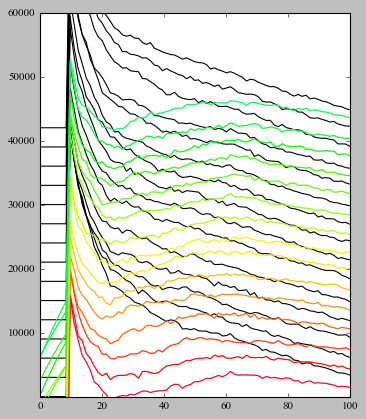

In [104]:

for particle in [particle]:
    print(particle)
    fig,ax = plt.subplots(figsize=(5,6))#6.8*cm,3.4*cm))#(10,5))#
    colors = ba.CreateColorsList(len(Exp_dict_S[particle].keys()))
    offset=0
    for c,time in enumerate(list(Exp_dict_S[particle].keys())[15:]):
        Ynew,ERS = ERS_dict_S[particle][time]
        ax.plot(X,Ynew+offset,color='k',label=time)
        
        X_exp,Ynewnewnew = Exp_dict_S[particle][time]
        Y = Ynewnewnew #ReduceNoise(X,Ynewnewnew,1,cutoff = 5000)
        ax.plot(X,Ynewnewnew+offset,color=colors[c],alpha=0.25)
        ax.plot(X,Y+offset,color=colors[c],label=time)
        offset+=3000

    ax.set(ylim=[10**0,6*10**4],xlim=[0,100],yscale='linear')
#         ax.legend(loc=[1.01,0],fontsize=8,ncol=1)

In [105]:
Exp_dict_S.keys()

dict_keys(['Particle_452'])

Starting to make SERS image.
(30, 2048)


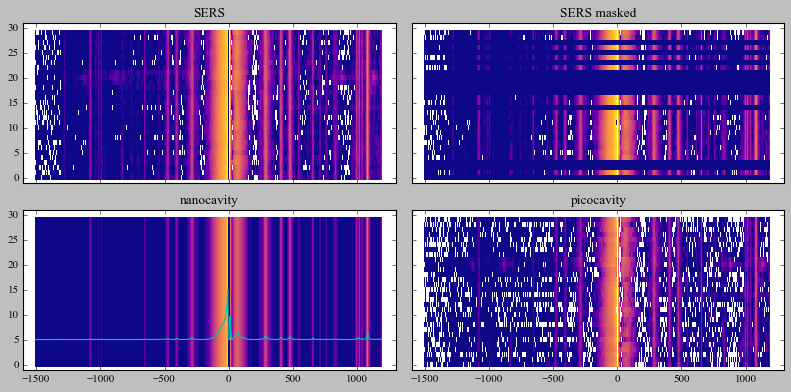

In [106]:
num_stds=3.2#1#4#3.5
multiplier = 3#3.3 #3
degree = 0#1.
subfolder = ''


                                                    
pico_dict = pc.PlotPicocavities2(X,PTsample,particle,Exp_dict_S,'Exp',pico_dict,subfolder,multiplier,degree,
                             num_stds=num_stds,vmin=50,
                                 mask=True,
                                 testing=False)

start time: 10.0
['10', '20']


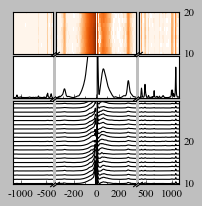

In [107]:
title = 'After ERS and exp removal, yes masking'
notchedge = 5.
with h5py.File(fullname, 'r') as f: 
    exposure_time = f['ParticleScannerScan_0'][particle]['SERS_0'].attrs['Exposure'] # seconds
pc.Figure4(X,PTsample,pico_dict,particle,exposure_time,pth,title,notchedge=5,save=False)

In [109]:
colors_r = ba.CreateColorsList(len(ERS_dict_S[particle].keys()))

In [110]:
SERS = pico_dict[PTsample][particle]['im']
nano = pico_dict[PTsample][particle]['nanocavity im']
pico = pico_dict[PTsample][particle]['picocavity im']
pico2 = SERS - nano

C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/Figure 4/Figs/Molecule 4 (BPT) Particle_452 after ERS and exp removal Nano and Picocav.png


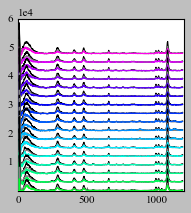

In [113]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(6.8*cm,6.8*cm))
offset=0
zorder=len(pico)
for m in range(len(pico)):
    if 13 <= m <= 30:
        ax.plot(X,SERS[m]+offset,color='k',zorder=zorder)#0)
        ax.plot(X,nano[m]+offset,color='grey',zorder=zorder)#1)
        ax.plot(X,pico2[m]+offset,color=colors_r[m],zorder=zorder)
        offset+=3*10**3#8*10**3#1.*10**4
        zorder-=1
    
ax.set(xlim=[0,1200],ylim=[10**0,6*10**4])#1.3*10**5])#9*10**4])

ax.xaxis.labelpad = 0.1
ax.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
# ax.set_yticks([20000,60000])
ax.xaxis.set_major_locator(MultipleLocator(500))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
# ax.xaxis.set_minor_locator(MultipleLocator(100))

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

Title = PTsample+' '+particle+' after ERS and exp removal'
figname = pth+folder+'Figs/'+Title+' Nano and Picocav.png'
print(figname)
ba.ensure_dir(figname)
# fig.savefig(figname,format='png',bbox_inches='tight',transparent=True,dpi=300)

C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/Thesis figures/Chapter 4/Picocavities/Molecule 4 (BPT) Particle_452 after ERS and exp removal Nano and Picocav.png


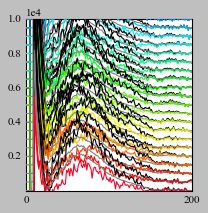

In [114]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(6.8*cm,6.8*cm))
offset=0
zorder=len(pico)
for m in range(len(pico)):
    if 0 <= m <= 29:
        ax.plot(X,SERS[m]+offset,color='k',zorder=zorder)#0)
        ax.plot(X,nano[m]+offset,color='grey',zorder=zorder)#1)
        ax.plot(X,pico2[m]+offset,color=colors_r[m],zorder=zorder)
        offset+=5*10**2#8*10**3#1.*10**4
        zorder-=1
    
ax.set(xlim=[0,200],ylim=[10**0,1*10**4])#1.3*10**5])#9*10**4])

ax.xaxis.labelpad = 0.1
ax.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
# ax.set_yticks([20000,60000])
ax.xaxis.set_major_locator(MultipleLocator(200))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
# ax.xaxis.set_minor_locator(MultipleLocator(100))

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

Title = PTsample+' '+particle+' after ERS and exp removal'
figname = pth+'Thesis figures/Chapter 4/Picocavities/'+Title+' Nano and Picocav.png'
print(figname)
ba.ensure_dir(figname)
# fig.savefig(figname,format='png',bbox_inches='tight',transparent=True,dpi=300)

C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/Figure 4/Figs/Molecule 4 (BPT) Particle_452 after ERS and exp removal SERS.png


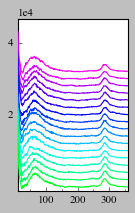

In [115]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(4.5*cm,6.8*cm))
offset=0
zorder=len(pico)
for m in range(len(pico)):
    if 13 <= m <= 30:
        ax.plot(X,SERS[m]+offset,color=colors_r[m],zorder=zorder)#0)
        #ax.plot(X,nano[m]+offset,color='grey',zorder=zorder)#1)
        #ax.plot(X,pico2[m]+offset,color=colors[m],zorder=zorder)
        offset+=2.*10**3#1.*10**4
        zorder-=1
    
ax.set(xlim=[10,360],ylim=[-10**3,4.65*10**4])#1.3*10**5])#9*10**4])

ax.xaxis.labelpad = 0.1
ax.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
ax.set_yticks([20000,40000])
ax.xaxis.set_major_locator(MultipleLocator(100))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(50))

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

Title = PTsample+' '+particle+' after ERS and exp removal'
figname = pth+folder+'Figs/'+Title+' SERS.png'
print(figname)
ba.ensure_dir(figname)
# fig.savefig(figname,format='png',bbox_inches='tight',transparent=True,dpi=300)

C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/Figure 4/Figs/Molecule 4 (BPT) Particle_452 after ERS and exp removal Picocav.png


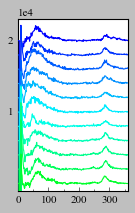

In [116]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(4.5*cm,6.8*cm))
offset=0
zorder=len(pico)
for m in range(len(pico)):
    if 13 <= m <= 23:
        #ax.plot(X,SERS[m]+offset,color=colors[m],zorder=zorder)#0)
        #ax.plot(X,nano[m]+offset,color='grey',zorder=zorder)#1)
        ax.plot(X,pico2[m]+offset,color=colors_r[m],zorder=zorder)
        offset+=2*10**3#1.*10**4
        zorder-=1
    
ax.set(xlim=[0,360],ylim=[-10**3,2.3*10**4])#1.3*10**5])#9*10**4])

ax.xaxis.labelpad = 0.1
ax.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
ax.set_yticks([10000,20000])
ax.xaxis.set_major_locator(MultipleLocator(100))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(50))

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

Title = PTsample+' '+particle+' after ERS and exp removal'
figname = pth+folder+'Figs/'+Title+' Picocav.png'
print(figname)
ba.ensure_dir(figname)
# fig.savefig(figname,format='png',bbox_inches='tight',transparent=True,dpi=300)

C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/Figure 4/Figs/Molecule 4 (BPT) Particle_452 after ERS and exp removal Picocav.png


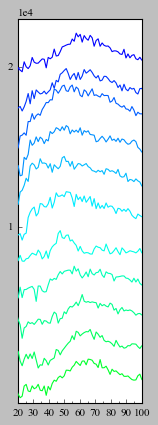

In [117]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(2,6))
offset=0
zorder=len(pico)
for m in range(len(pico)):
    if 13 <= m <= 23:
#         Y = SERS[m]
#         Y_fltrd = ReduceNoise(X,Y,1,cutoff = 7000)
        #ax.plot(X,SERS[m]+offset,color=colors[m],zorder=zorder)#0)
        #ax.plot(X,nano[m]+offset,color='grey',zorder=zorder)#1)
        Y_fltrd = ba.ReduceNoise(X,pico2[m],1,cutoff = 7000)
        ax.plot(X,pico2[m]+offset,color=colors_r[m],zorder=zorder)
        offset+=2*10**3#1.*10**4
        zorder-=1
    
ax.set(xlim=[20,100],ylim=[-10**3,2.3*10**4])#1.3*10**5])#9*10**4])

ax.xaxis.labelpad = 0.1
ax.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
ax.set_yticks([10000,20000])
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(5))

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

Title = PTsample+' '+particle+' after ERS and exp removal'
figname = pth+folder+'Figs/'+Title+' Picocav.png'
print(figname)
# ba.ensure_dir(figname)
# fig.savefig(figname,format='png',bbox_inches='tight',transparent=True,dpi=300)

Particle_452
C:/Users/aboeh/OneDrive/Documents/Python Scripts for Github/Figure 4/Figs/Molecule 4 (BPT) Particle_452 params.png


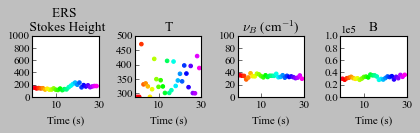

In [119]:
color = 'k'

for particle in Exp_param_dict_S.keys():
    print(particle)
    #fig,ax = plt.subplots(figsize=(5,5))
    fig, axes = plt.subplots(figsize=(13.6*cm,4.5*cm),ncols=4)
    #fig.suptitle(particle)
    #colors = CreateColorsList(len(Exp_param_dict_S[interval][particle].keys()))
    Time = []
    Invb = []
    Temp = []
    Stokes_Height = []
    Exp_coeff = []
    for time in Exp_param_dict_S[particle].keys():
        initial_params = ERS_initial_params_dict_S[particle][time]
        solution = ERS_params_dict_S[particle][time]
        fit_params = Exp_param_dict_S[particle][time]
        b = fit_params[0]
        invb = -1/b # cm-1 
        Time.append(float(time))
        Invb.append(invb)

        Temp.append(solution[1])
        Stokes_Height.append(initial_params[0])
        Exp_coeff.append(fit_params[1])

    axes[0].scatter(Time,Stokes_Height,s=10,c=colors_r,edgecolor='face')#color=color)#,color=colors[c]),zorder=3)
    axes[0].set(ylim=[0,1000],title='ERS \n Stokes Height') #ylim=[0,700]
    axes[1].scatter(Time,Temp,s=10,c=colors_r,edgecolor='face')#color=color)#,color=colors[c]),zorder=3)
    axes[1].set(ylim=[288,500],title='T')
    axes[3].scatter(Time,Exp_coeff,s=10,c=colors_r,edgecolor='face')#color=color)#,color=colors[c]),zorder=3)
    axes[3].set(ylim=[0,10**5],title='B')
    axes[3].ticklabel_format(axis='y',style='sci',scilimits=(0,0))

    axes[2].scatter(Time,Invb,s=10,c=colors_r,edgecolor='face')#color=color)#,color=colors[c])
    axes[2].set(ylim=[0,100],title=r'$\nu_B$ (cm$^{-1}$)')

    for ax in axes:
        ax.set(xlabel='Time (s)',xlim=[-1,30])
        ax.set_xticks([10,30])
        #ax.set_xticklabels([])
        #ax.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')
        ax.tick_params(axis='both', which='major', pad=2)

    fig.set_tight_layout(True) 

    Title = PTsample+' '+particle+' params'
    figname = pth+folder+'Figs/'+Title+'.png'
    print(figname)
    ba.ensure_dir(figname)
#     fig.savefig(figname,format='png',bbox_inches='tight',transparent=True,dpi=300)

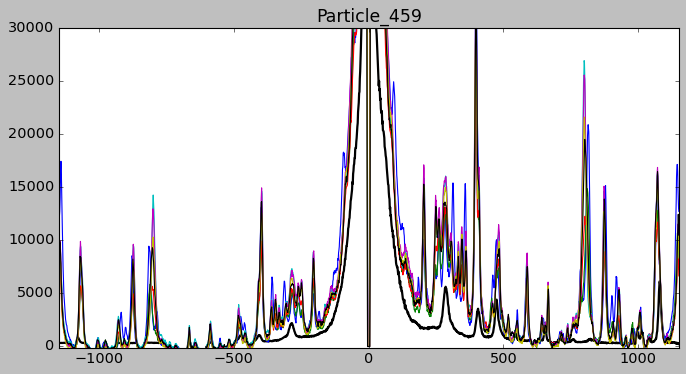

In [105]:
# for particle in ['Particle_459']:#sample_dict.keys():
#     fig, ax = plt.subplots(1, 1, figsize=(10,5))
# #     WN = sample_dict[particle]['WN']
# #     im = sample_dict[particle]['SERS']
# #     im = sample_dict[particle]['picocavity']
#     WN = ERS_dict[particle]['WN']
#     im = ERS_dict[particle]['SERS']
#     nano_ave = sample_dict[particle]['nanocavity average']
#     ax.plot(WN,nano_ave,color='k',lw=2)

#     mns = []
#     for m in range(np.shape(im)[0]):
        
#         mn_i = np.argmin(im[m,:])
#         mns.append(mn_i)
#         #print(WN[mn_i],im[m,:][mn_i])
#         if im[m,:][mn_i] < -500:
#             ax.plot(WN,im[m,:])
        
#     ax.set(xlim=[-1150,1150],title=particle,ylim=[-100,30000])


In [122]:
particle

'Particle_448'

In [126]:
WN  = X

In [134]:
# # Figure 4 cut
# start_row = 6
# exposure_time = 1 # second

# im = pico_dict[PTsample][particle]['im'][start_row:]
# nanocavity_im = pico_dict[PTsample][particle]['nanocavity im'][start_row:]
# picocavity_im = pico_dict[PTsample][particle]['picocavity im'][start_row:]
# # pico2 = SERS - nano

# mask = np.abs(WN) < 23.
# # X_2 = X[~mask]
# # Y_2 = Y[~mask]

# # WN_dl = WN[~mask]
# im_dl_lst = []
# # for row in im:
# #     im_dl_lst.append(row[~mask])
# # im_dl = np.array(im_dl_lst)
# for row in im:
#     row[mask] = np.ones(len(np.delete(mask, np.where(mask ==False)))) * 0.1
#     im_dl_lst.append(row)
# im_dl = np.array(im_dl_lst)

# nano_ave = pc.AverageOfRows(nanocavity_im)
# nano_ave_filtered = ba.ReduceNoise(WN,nano_ave,1,cutoff = 5000)
# nano_ave_mskd = np.ma.masked_array(nano_ave_filtered, mask=mask)
    
    
# fig,axes = plt.subplots(nrows=3, ncols=3,figsize=(5,5),sharex='col',sharey='row',
#                         squeeze=True,
#                         #constrained_layout=True,
#                         gridspec_kw={'height_ratios': [1., 1, 2],'width_ratios': [1, 2, 1]}
#                        )
# fig.subplots_adjust(hspace=0.05,wspace=0.05)  # adjust space between axes
    
# #     xlim = [-1150,1150]
# mid = 360 #199
# xlim_col0 = [-1150,-1*mid]
# xlim_col1 = [-1*mid,mid]
# xlim_col2 = [mid,1150]
# ai = ba.FindIndexX(-1*mid,WN)
# bi = ba.FindIndexX(mid,WN)

# # TIMESCAN
# Time = []
# t = 0
# for i in range(np.shape(im)[0]):
#     Time.append(t)
#     t+=exposure_time

# colorz = 'inferno'#'bone'
# mn = 150 #50 #10**2
# mx = np.amax(im)

# pcm = axes[0,0].pcolormesh(WN[:ai], Time, im_dl[:,:ai], cmap=colorz, shading='nearest', 
#                            norm=clrs.LogNorm(vmin=mn, vmax=mx))#vmin=0, vmax=mx) #
# axes[0,0].tick_params(axis='both', labelbottom=False, labeltop=False, labelleft=False, labelright=False)
# pcm = axes[0,1].pcolormesh(WN[ai:bi], Time, im_dl[:,ai:bi], cmap=colorz, shading='nearest', 
#                            norm=clrs.LogNorm(vmin=mn, vmax=mx))#vmin=0, vmax=mx) #
# # fig.colorbar(pcm, ax=axes[:,:],location='left',shrink=0.15,aspect=5)
# axes[0,1].tick_params(axis='both', labelbottom=False, labeltop=False, labelleft=False, labelright=False)
# pcm = axes[0,2].pcolormesh(WN[bi:], Time, im_dl[:,bi:], cmap=colorz, shading='nearest', 
#                            norm=clrs.LogNorm(vmin=mn, vmax=mx))#vmin=0, vmax=mx) #
# axes[0,2].tick_params(axis='both', labelbottom=False, labeltop=False, labelleft=False, labelright=True)
# #     fig.colorbar(pcm, ax=axes[0,1], location='top',#orientation='horizontal'#,use_gridspec=True
# #                  aspect=70,pad=0.001
# #                 )

# # NANOCAVITY
# # axes[1,0].plot(WN[:ai],np.log10(nano_ave[:ai]),color='k')#,label='Nanocavity average spectrum')
# # axes[1,1].plot(WN[ai:bi],np.log10(nano_ave[ai:bi]),color='k')
# # axes[1,2].plot(WN[bi:],np.log10(nano_ave[bi:]),color='k')
# axes[1,0].plot(WN[:ai],nano_ave_mskd[:ai],color='k')#,label='Nanocavity average spectrum')
# axes[1,1].plot(WN[ai:bi],nano_ave_mskd[ai:bi],color='k')
# axes[1,2].plot(WN[bi:],nano_ave_mskd[bi:],color='k')

# # PICOCAVITY
# Y0 = picocavity_im[10]
# mx = np.max(Y0)
# offset = 0
# offsetincrement = mx / 2. #10.
# #colors = op.CreateColorsList(np.shape(PICO)[0]+5,colormap='viridis')#'brg')#'turbo')
# c=0
# H = []
# time_increment = 10
# for m in range(np.shape(picocavity_im)[0]):
#     if m % 2 == 0:
#         label = str(m)
#     else:
#         label = None
#     Y_unmasked = picocavity_im[m,:] #_unmasked
# #     Y = np.ma.masked_where(((WN<7)&(WN>-7)), Y_unmasked) 
#     Y_mskd = np.ma.masked_array(Y_unmasked, mask=mask)
#     Y = ba.ReduceNoise(WN,Y_mskd,1,cutoff = 5000)
#     if m % time_increment == 0:
#         Yoffset = Y+offset
#         H.append(Yoffset[-1])
#     axes[2,0].plot(WN[:ai],Y[:ai]+offset,label=label,color='k')#colors[c])
#     axes[2,1].plot(WN[ai:bi],Y[ai:bi]+offset,label=label,color='k')#colors[c])
#     axes[2,2].plot(WN[bi:],Y[bi:]+offset,label=label,color='k')#colors[c])
#     offset += offsetincrement
#     c+=1

# #ax.legend(loc='best',ncol=10,fontsize=6)


# #     axes[0].get_yaxis().set_visible(True)
# axes[0,0].set(ylim=[0,Time[-1]])
# # axes[0,2].set(ylabel='Time (s)')
# # axes[0,2].yaxis.set_label_position("right")
# axes[0,2].yaxis.tick_right()

# # axes[1,0].set(yscale='linear',ylabel='I$_{Nano}$')#'log(I$_{Nano}$)')


# L = list(range(0,80,50))#range(6) #[10**l for l in range(6)]
# axes[1,0].set_yticks(L)
# L_labels = [str(l) for l in L]#['10$^{}$'.format(l) for l in L]
# axes[1,0].set_yticklabels(L_labels)
# axes[1,0].yaxis.tick_left()


# axes[2,2].set_yticks(H)
# H_labels = [str(int(t)) for t in Time][::time_increment]
# axes[2,2].set_yticklabels(H_labels)
# axes[2,2].yaxis.tick_right()
# # axes[2,2].set(ylabel='Time (s)')
# # axes[2,2].yaxis.set_label_position("right")


# axes[2,1].set(#ylim=[0.1,40000],#yscale='log',
#     #xlim=xlim,
#     #title = particle,
# #     xlabel = 'Raman Shift (cm$^{-1}$)'
# )    
# for ax in axes[1:,0]:
#     ax.set_ylim(bottom=-1)
# for r in [0,1,2]:
#     axes[r,0].set_xlim(xlim_col0)
#     axes[r,1].set_xlim(xlim_col1)
#     axes[r,2].set_xlim(xlim_col2)
# #     axes[2,1].yaxis.set_major_locator(MultipleLocator(10**))
# #     axes[2,1].yaxis.set_major_formatter(FormatStrFormatter('%d'))
# axes[2,0].xaxis.set_major_locator(MultipleLocator(500))
# axes[2,0].xaxis.set_major_formatter(FormatStrFormatter('%d'))
# axes[2,1].xaxis.set_major_locator(MultipleLocator(200))
# axes[2,1].xaxis.set_major_formatter(FormatStrFormatter('%d'))
# axes[2,1].xaxis.set_minor_locator(MultipleLocator(100))
# axes[2,2].xaxis.set_major_locator(MultipleLocator(500))
# axes[2,2].xaxis.set_major_formatter(FormatStrFormatter('%d'))

# # hide the spines 
# axes[1,0].spines['right'].set_visible(False)
# axes[1,1].spines['right'].set_visible(False)
# axes[1,1].spines['left'].set_visible(False)
# axes[1,2].spines['left'].set_visible(False)
# axes[2,0].spines['right'].set_visible(False)
# axes[2,1].spines['right'].set_visible(False)
# axes[2,1].spines['left'].set_visible(False)
# axes[2,2].spines['left'].set_visible(False)


# # hide the ticks
# axes[1,0].tick_params(axis='both', labelbottom=True, labeltop=False, labelleft=False, labelright=False, bottom=True, top=False, left=False, right=False)
# axes[1,1].tick_params(axis='both', labelbottom=True, labeltop=False, labelleft=False, labelright=False, bottom=True, top=False, left=False, right=False)
# axes[1,2].tick_params(axis='both', labelbottom=True, labeltop=False, labelleft=False, labelright=False, bottom=True, top=False, left=False, right=False)


# axes[2,0].tick_params(axis='both', labelbottom=True, labeltop=False, labelleft=False, labelright=False, bottom=True, top=False, left=False, right=False)
# axes[2,1].tick_params(axis='both', labelbottom=True, labeltop=False, labelleft=False, labelright=False, bottom=True, top=False, left=False, right=False)
# axes[2,2].tick_params(axis='both', labelbottom=True, labeltop=False, labelleft=False, labelright=True, bottom=True, top=False, left=False, right=True)
# #     ax.yaxis.set_ticks_position('left')
# #     ax.xaxis.set_ticks_position('bottom')


# # / / 
# # Now, let's turn towards the cut-out slanted lines.
# # We create line objects in axes coordinates, in which (0,0), (0,1),
# # (1,0), and (1,1) are the four corners of the axes.
# # The slanted lines themselves are markers at those locations, such that the
# # lines keep their angle and position, independent of the axes size or scale
# # Finally, we need to disable clipping.
# d = .75  # proportion of vertical to horizontal extent of the slanted line
# kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
#               linestyle="none", color='k', mec='k', mew=1, clip_on=False)
# for r in [0,1,2]:
#     axes[r,0].plot([1], [0], transform=axes[r,0].transAxes, **kwargs)
#     axes[r,1].plot([0, 1], [0,0], transform=axes[r,1].transAxes, **kwargs)
#     axes[r,2].plot([0], [0], transform=axes[r,2].transAxes, **kwargs)
# # /  /


# # figname = pth+'2021-11-02/BPT/Picocavities/'+particle+'_Figure4_v2.png'
# figname = pth+folder+'Figs/'+particle+'_Figure4_cut_narrower.png'
# print(figname)
# ba.ensure_dir(figname)
# # fig.savefig(figname,format='png',bbox_inches='tight',transparent=True,dpi=300)
# #plt.close()